<a href="https://colab.research.google.com/github/nicosaboonchi/Deep-Learning/blob/main/Classification_with_MNIST_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hello Deep Learning with MNSIT (Pytorch)

In this notebook I will be using computer vision to tackle the "Hello World" of deep learning using Pytorch.

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


## 1. Getting the dataset

In [ ]:
train_dataset = datasets.MNIST(root="data",
                               train=True,
                               download=True,
                               transform=ToTensor(),
                               target_transform=None)
test_dataset = datasets.MNIST(root="data",
                              train=False,
                              download=True,
                              transform=ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 72401280.38it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 84180468.26it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 21159350.51it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 23753776.52it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



### 1.1 Taking a look at some of the attributes of the dataset

In [ ]:
# look at the first sample of our dataset
image, label = train_dataset[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
classes = train_dataset.classes
classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [ ]:
# (Color channels, height, width)
image.shape

torch.Size([1, 28, 28])

In [ ]:
# how many samples are there?
len(train_dataset.data), len(train_dataset.targets), len(test_dataset), len(test_dataset.targets)

(60000, 60000, 10000, 10000)

### 1.1 Plot the image

Text(0.5, 1.0, 'This is a: 5')

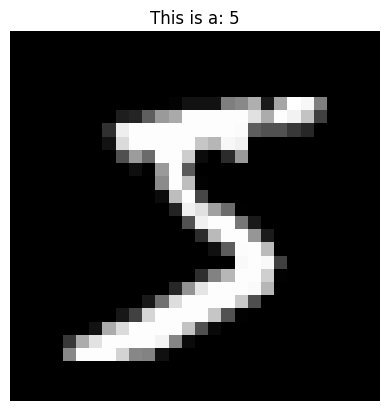

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.axis(False)
plt.title(f"This is a: {label}")

### 1.2 plot multiple images in a grid

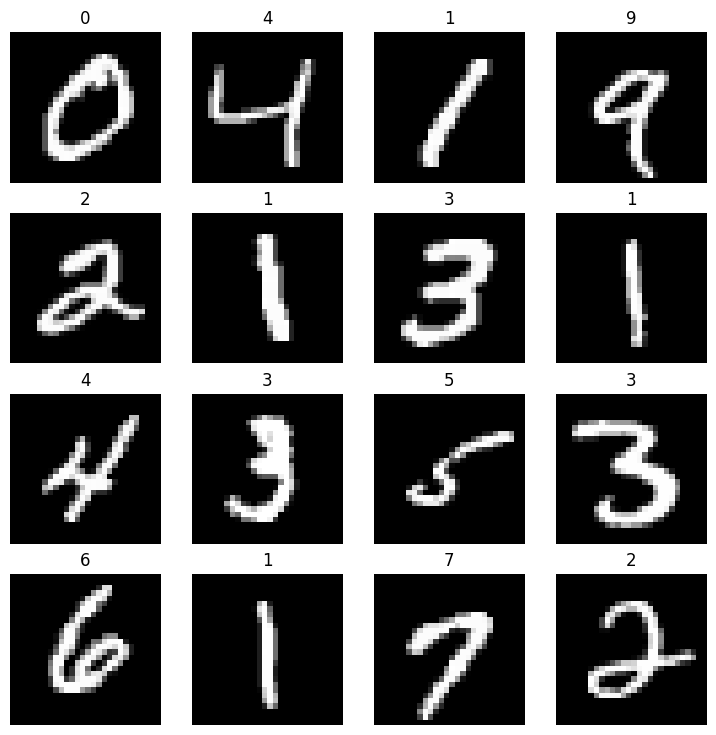

In [ ]:
plt.figure(figsize=(9,9))

rows, columns = 4,4
for i in range(1, rows * columns + 1):
  plt.subplot(rows, columns, i)
  random_idx = torch.randint(low=0,
                         high=len(train_dataset),
                         size=[1])
  img, label = train_dataset[i]
  plt.imshow(img.squeeze(), cmap="gray")
  plt.axis(False)
  plt.title(label)

## Prepare the Dataloader

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 25

train_dataloader = DataLoader(train_dataset,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(test_dataset,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train dataloader: 2400 batches of 25
Length of test dataloader: 400 batches of 25


In [ ]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Shape of train features: {train_features.shape}")
print(f"Shape of train labels: {train_labels.shape}")

Shape of train features: torch.Size([20, 1, 28, 28])
Shape of train labels: torch.Size([20])


## 1.1 plot using the dataloader

(-0.5, 27.5, 27.5, -0.5)

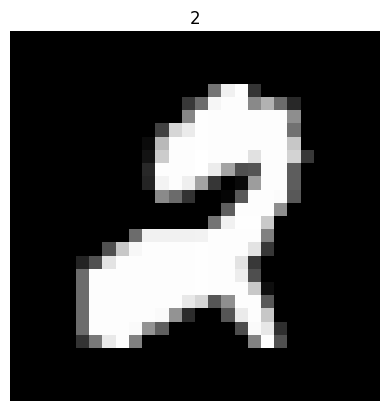

In [ ]:
idx = torch.randint(0,
                    len(train_features),
                    size=[1])
plt.imshow(train_features[idx].squeeze(), cmap="gray")
plt.title(train_labels[idx].item())
plt.axis(False)

## Building Baseline Model

### Set Device agnostic code


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
class MNISTV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten tensor into one dimension
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

torch.manual_seed(42)
model_0 = MNISTV0(input_shape=784,
                  hidden_units=10,
                  output_shape=len(train_dataset.classes))
model_0.to(device)

MNISTV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
from helper_functions import accuracy_fn

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

### 1.1 Pick a loss and optimizer

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 1.2 Build training loop
Since we are going to train many models we will functionize the training loop

In [ ]:
from tqdm.auto import tqdm

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  train_loss, train_accuracy = 0,0
  model.to(device)

  for batch, (X,y) in enumerate(data_loader):
    model.train()
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_accuracy += accuracy_fn(y_true=y,
                           y_pred=y_pred.argmax(dim=1))

    # 3. Zero gradiants
    optimizer.zero_grad()

    # 4. back prop
    loss.backward()

    # optimizer step
    optimizer.step()

  train_loss /= len(data_loader)
  train_accuracy /= len(data_loader)

  print(f"Training loss: {train_loss:.5f} | Train Accuracy: {train_accuracy:.2f}%")

  return train_accuracy

### 1.3 Build Testing loop

In [ ]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):

  test_loss, test_acc = 0,0
  model.to(device)

  with torch.inference_mode():
    for X,y in data_loader:
      X,y = X.to(device), y.to(device)

      # 1. Forward pass
      y_pred = model(X)

      # 2. Calc loss
      loss = loss_fn(y_pred, y)
      test_loss += loss
      test_acc += accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(dim=1))

    # print whats happinin'
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    print(f"Test loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%\n")

  return test_acc

### 1.3 Run the training and test loops

In [ ]:
torch.manual_seed(42)
epochs = 3

train_start_time = timer()

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} -------------")
  train_step(model=model_0,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_0,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
train_end_time = timer()
train_total_time = print_train_time(start=train_start_time,
                 end=train_end_time,
                 device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 -------------
Training loss: 0.39135 | Train Accuracy: 88.75%
Test loss: 0.29789 | Test Accuracy: 91.44%

Epoch: 1 -------------
Training loss: 0.31698 | Train Accuracy: 91.04%
Test loss: 0.29181 | Test Accuracy: 91.74%

Epoch: 2 -------------
Training loss: 0.30515 | Train Accuracy: 91.36%
Test loss: 0.29617 | Test Accuracy: 91.58%

Train time on cpu: 36.778 seconds


## Build a non-linear model

### 1.1 Model Architecture

In [ ]:
class MNISTV1(nn.Module):
  def __init__(self,
                input_shape: int,
                hidden_units: int,
                output_shape: int):

    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x):
    return self.layer_stack(x)

torch.manual_seed(42)
model_1 = MNISTV1(input_shape=784,
                  hidden_units=256,
                  output_shape=len(train_dataset.classes))
model_1.to(device)

MNISTV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=10, bias=True)
    (4): ReLU()
  )
)

### 1.2 Set loss and optimizer

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### 1.3 Training

In [ ]:
torch.manual_seed(42)
epochs = 8
test_acc = []
train_acc = []

train_start_time = timer()

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} -------------")
  train_acc.append(train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device))
  test_acc.append(test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device))
train_end_time = timer()
train_total_time = print_train_time(start=train_start_time,
                 end=train_end_time,
                 device=device)

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 0 -------------
Training loss: 0.56062 | Train Accuracy: 81.80%
Test loss: 0.39336 | Test Accuracy: 85.82%

Epoch: 1 -------------
Training loss: 0.29144 | Train Accuracy: 89.91%
Test loss: 0.11359 | Test Accuracy: 96.64%

Epoch: 2 -------------
Training loss: 0.10490 | Train Accuracy: 97.02%
Test loss: 0.08992 | Test Accuracy: 97.34%

Epoch: 3 -------------
Training loss: 0.07863 | Train Accuracy: 97.70%
Test loss: 0.08349 | Test Accuracy: 97.47%

Epoch: 4 -------------
Training loss: 0.06103 | Train Accuracy: 98.20%
Test loss: 0.07101 | Test Accuracy: 97.81%

Epoch: 5 -------------
Training loss: 0.04920 | Train Accuracy: 98.58%
Test loss: 0.07388 | Test Accuracy: 97.67%

Epoch: 6 -------------
Training loss: 0.04036 | Train Accuracy: 98.81%
Test loss: 0.06665 | Test Accuracy: 97.97%

Epoch: 7 -------------
Training loss: 0.03304 | Train Accuracy: 99.05%
Test loss: 0.06222 | Test Accuracy: 98.09%

Train time on cpu: 105.479 seconds


### 1.4 Plot Accuracies

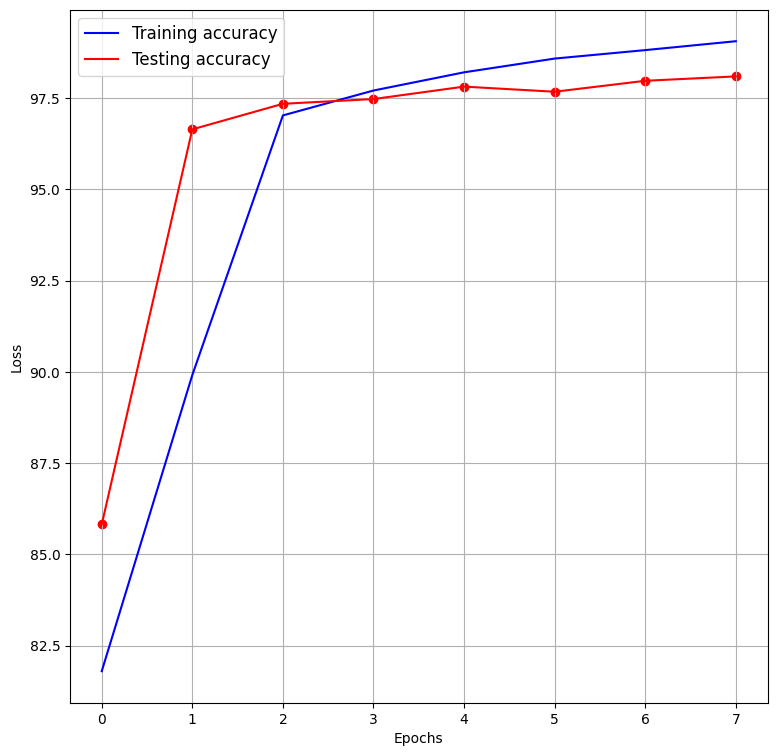

In [ ]:
plt.figure(figsize=(9,9))
plt.plot(list(range(0, epochs)), train_acc, "b", label="Training accuracy")
plt.plot(list(range(0, epochs)), test_acc, "r", label="Testing accuracy")
plt.scatter(list(range(0, epochs)), test_acc, c="r", marker="o")
plt.xticks(list(range(0, epochs)))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(fontsize="large")
plt.grid(True)
plt.show()

In [ ]:
# highest acc = 98.23% hidden units 256, lr = 0.1, epochs = 10, batch = 20

## Make predictions

### 1.1 Create prediciton function

In [ ]:
def make_prediction(model: torch.nn.Module,
                    data: list,
                    device: torch.device=device):

  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:

      # for sample in data auto squeezes a dimension?????
      sample = torch.unsqueeze(sample, dim=0).to(device)

      pred_logits = model(sample)

      pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

### 1.2 Plot predicted vs actual

In [ ]:
import random

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_dataset), k=16):
  test_samples.append(sample)
  test_labels.append(label)

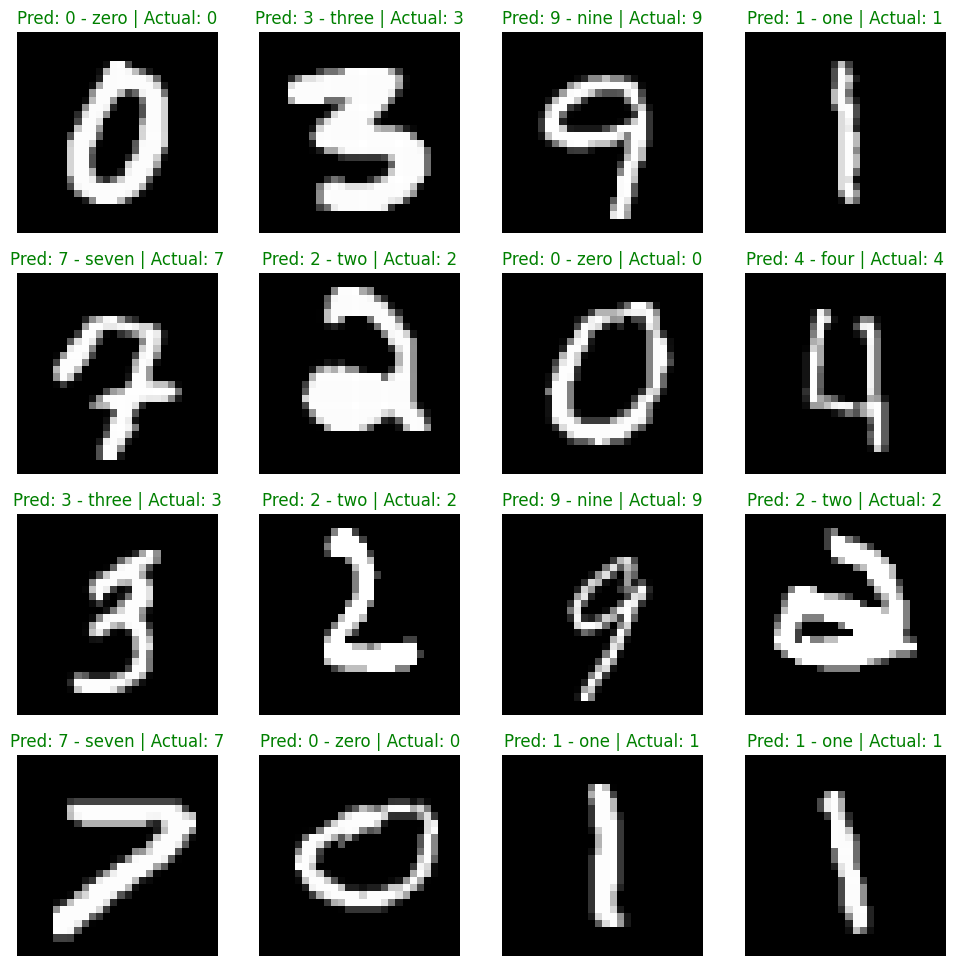

In [ ]:
plt.figure(figsize=(12,12))
for i in range(0,len(test_samples)):
  pred_idx = make_prediction(model=model_1,
                             data=test_samples[i]).argmax(dim=1).item()

  plt.subplot(4,4, i+1)
  if int(classes[pred_idx][0]) == test_labels[i]:
    plt.title(f"Pred: {classes[pred_idx]} | Actual: {test_labels[i]}", color="green")
  else:
    plt.title(f"Pred: {classes[pred_idx]} | Actual: {test_labels[i]}", color="red")

  plt.imshow(X=test_samples[i].squeeze(), cmap="gray")
  plt.axis(False)

### 1.3 Make confusion matrix

In [ ]:
from tqdm.auto import tqdm

y_preds = []
model_1.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making Predictions..."):

    X, y = X.to(device), y.to(device)

    pred_logits = model_1(X)

    y_pred = torch.softmax(pred_logits.squeeze(), dim=0).argmax(dim=1)

    y_preds.append(y_pred.cpu())

y_preds_tensor = torch.cat(y_preds)
y_preds_tensor

Making Predictions...:   0%|          | 0/400 [00:00<?, ?it/s]

tensor([7, 2, 1,  ..., 4, 5, 6])

In [ ]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 41.5 MB/s eta 0:00:00
mlxend version: 0.23.0


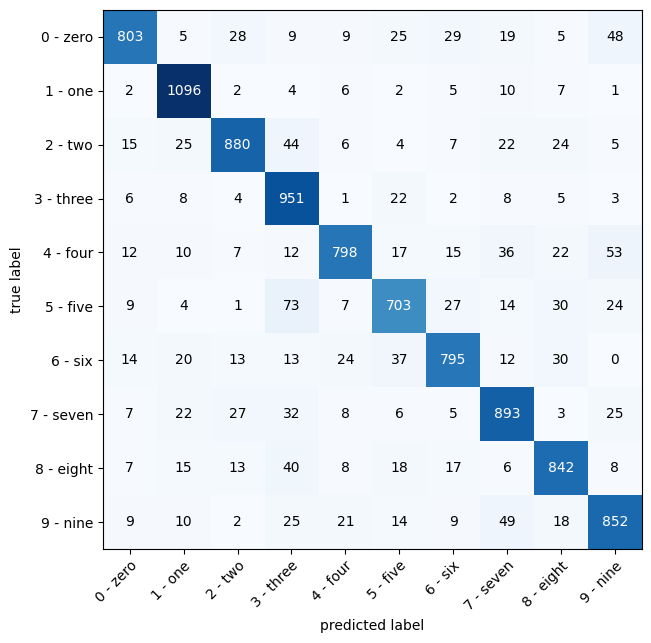

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task="Multiclass",
                          num_classes=len(classes))
confmat_tensor = confmat(preds=y_preds_tensor,
                         target=test_dataset.targets)

fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                class_names=classes,
                                figsize=(10,7))

In [ ]:
from torchmetrics import Accuracy
accuracy = Accuracy(task="Multiclass",
                    num_classes=len(test_dataset))
accuracy(preds=y_preds_tensor,
         target=test_dataset.targets)

tensor(0.8613)

AttributeError: ignored